In [1]:
from scipy.integrate import quad
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd


In [2]:
file_name = 'CH4 954 ppm raw/00'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(1,100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)


             x           y0          y1        y2          y3
0            0  820507000.0 -14444500.0 -227840.0 -13735900.0
1            1  859676000.0  -6947580.0 -219392.0 -12532000.0
2            2  833578000.0    829952.0 -211968.0 -13924400.0
3            3  905413000.0   8641790.0 -206080.0 -16608000.0
4            4  806905000.0  15951100.0 -196608.0 -16278500.0
...        ...          ...         ...       ...         ...
9599995  95995  702471000.0 -23103000.0 -188928.0 -11244300.0
9599996  95996  786943000.0 -16965100.0 -192512.0 -13622000.0
9599997  95997  834429000.0  -9716480.0 -176128.0 -12947500.0
9599998  95998  827305000.0  -1933570.0 -163840.0 -12815100.0
9599999  95999  863073000.0   5976830.0 -177408.0 -15446000.0

[9600000 rows x 5 columns]


$$Wavelet\ Pyro$$

In [3]:
# Size_pyro = 9_600_000
Size_pyro = 9_600_000

sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

dt = 1.0/48_000

# wavelet = 'gaus1'
# max_scale = 5.65
# min_scale = 5.25

# wavelet = 'mexh'
# max_scale = 6.9
# min_scale = 6.5


# wavelet = 'gaus3'
# max_scale = 11.2
# min_scale = 10.5


wavelet = 'gaus4'
max_scale = 14.1
min_scale = 13





# wavelet = 'morl'
# max_scale = 23
# min_scale = 21



scales = np.arange(min_scale, max_scale, 0.005)

slase = 95750
size_shape = 500

delta_time = 48000
interval = int(Size_pyro/delta_time)




In [4]:
[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)


period = 1.0/frequencies

print(frequencies)

cfs_pyro_shape = np.array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])


# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))



[1846.15384615 1845.44405998 1844.73481937 1844.0261237  1843.31797235
 1842.61036468 1841.90330008 1841.19677791 1840.49079755 1839.78535837
 1839.08045977 1838.37610111 1837.67228178 1836.96900115 1836.26625861
 1835.56405354 1834.86238532 1834.16125334 1833.46065699 1832.76059565
 1832.0610687  1831.36207554 1830.66361556 1829.96568814 1829.26829268
 1828.57142857 1827.8750952  1827.17929197 1826.48401826 1825.78927349
 1825.09505703 1824.4013683  1823.70820669 1823.01557159 1822.32346241
 1821.63187856 1820.94081942 1820.25028441 1819.56027293 1818.87078439
 1818.18181818 1817.49337372 1816.80545042 1816.11804767 1815.4311649
 1814.74480151 1814.05895692 1813.37363053 1812.68882175 1812.00453001
 1811.32075472 1810.63749528 1809.95475113 1809.27252167 1808.59080633
 1807.90960452 1807.22891566 1806.54873918 1805.86907449 1805.18992102
 1804.5112782  1803.83314543 1803.15552216 1802.47840781 1801.8018018
 1801.12570356 1800.45011253 1799.77502812 1799.10044978 1798.42637692
 1797.75

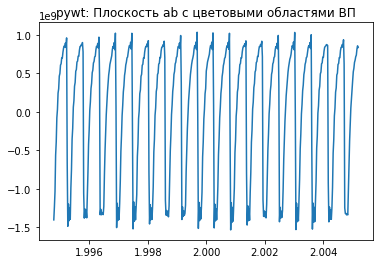

In [5]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, frequencies)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

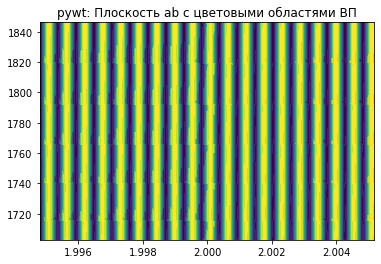

In [6]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape, extend='both')
plt.show()

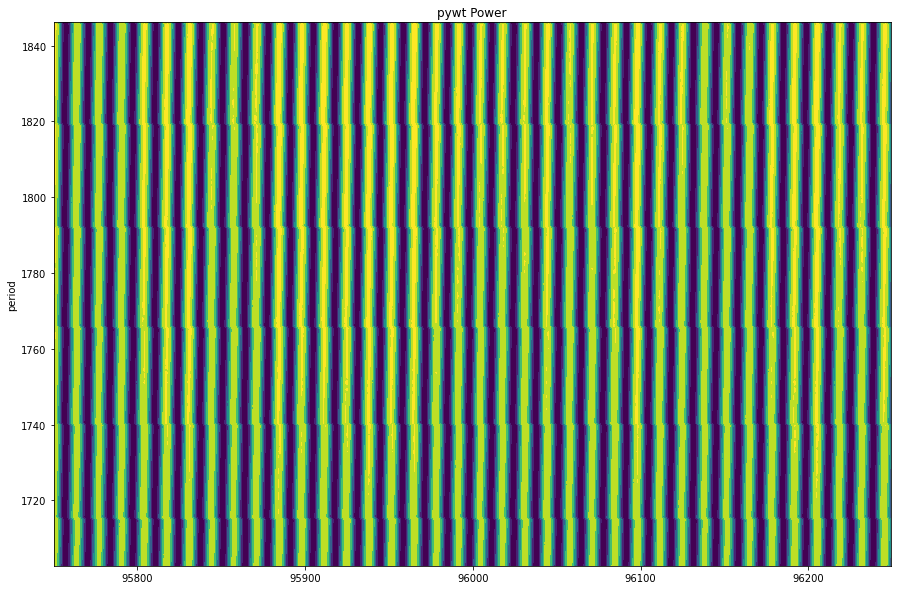

In [7]:
# power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (abs(cfs_pyro_shape))**2

# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], frequencies, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

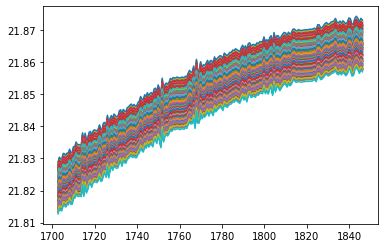

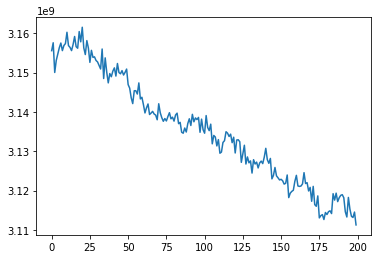

In [8]:
# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = abs(cfs_pyro).transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = np.zeros((interval,int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[j][i-1] = temp_pyro[i-1].mean()
    plt.plot(frequencies, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()

$$Save\ \  Pyro\ \  in\ \  .csv$$

In [9]:
from pathlib import Path  

df_mean_pyro_scales = pd.DataFrame(mean_pyro_scales)
df_mean_pyro_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/gaus4_pyro_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_pyro_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)


$$KERNEL\ \  FALLED$$

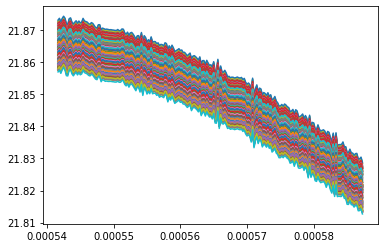

1843.31797235023


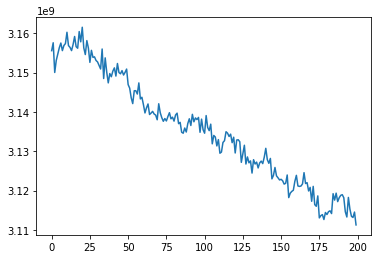

In [4]:
file_name_pyro = 'wt_raw/gaus4_pyro_954.csv'
df_pyro_Amp = pd.read_csv(file_name_pyro) 
df_pyro_Amp = df_pyro_Amp.drop('Unnamed: 0', axis = 1)


mean_pyro_scales = df_pyro_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_pyro_Amp.columns)])

plt.figure('max_Amp')
    
Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(period, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     print(1.0/period[mean_pyro_scales[j].argmax()])
plt.show()

print(1.0/period[mean_pyro_scales[1].argmax()])


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()    


$$Wavelet \ OAD$$

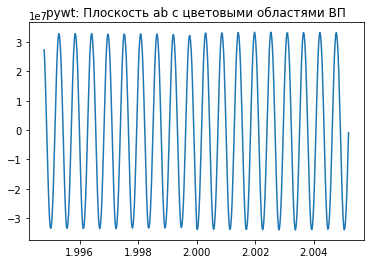

In [5]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

period = 1.0/frequencies

A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
cfs_oad_shape = np.array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

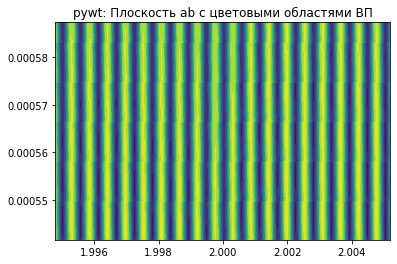

In [6]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

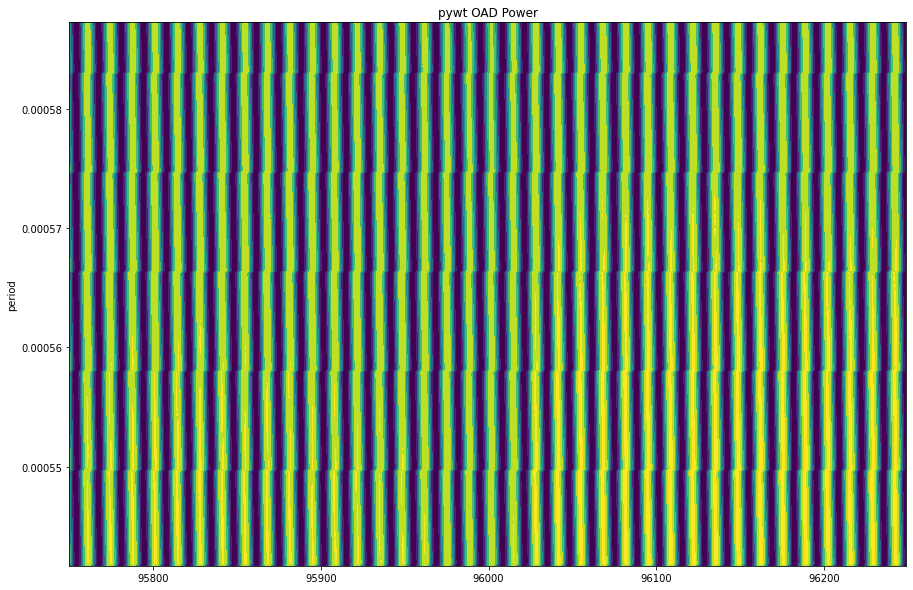

In [7]:
# power_oad = (abs(cfs_oad)) ** 2
power_oad_shape = (abs(cfs_oad_shape))**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

In [1]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = abs(cfs_oad).transpose()
# Amp_oad = zeros((interval))


mean_oad_scales = np.zeros((interval,int(len(scales))))

Max_oad_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[j][i-1] = temp_oad[i-1].mean()
    plt.plot(period, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_oad_amp_scales))
plt.show()

NameError: name 'cfs_oad' is not defined

$$Save \ OAD \ to \ .csv$$

In [9]:
from pathlib import Path  

df_mean_oad_scales = pd.DataFrame(mean_oad_scales)
df_mean_oad_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/gaus4_oad_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

$$ KERNEL \ FALLED$$

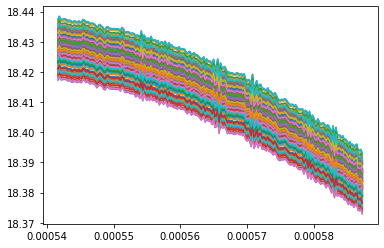

1845.4440599769318


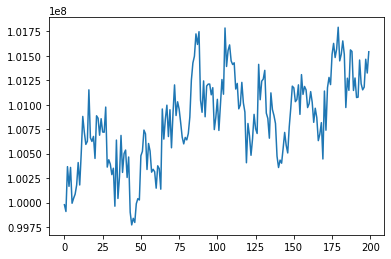

In [10]:
file_name_oad = 'wt_raw/gaus4_oad_954.csv'
df_oad_Amp = pd.read_csv(file_name_oad) 
df_oad_Amp = df_oad_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_scales = df_oad_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_oad_Amp.columns)])

plt.figure('max_Amp')
    
Max_oad_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(period, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_oad_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
plt.show()    



$$Wavelet \ \ \ OAD\ / \ Pyro$$

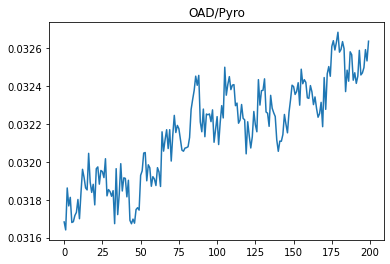

In [11]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_wavelet)
plt.show()

$$Fourier \ Transform$$

In [12]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1740
max_freq = 1840

max_intensity_OAD = np.zeros(200)
max_index_OAD = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

for i in range(100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE]
    OAD = df.y1.values[0:SAMPLE_RATE]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*i] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*i+1] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i+1] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])

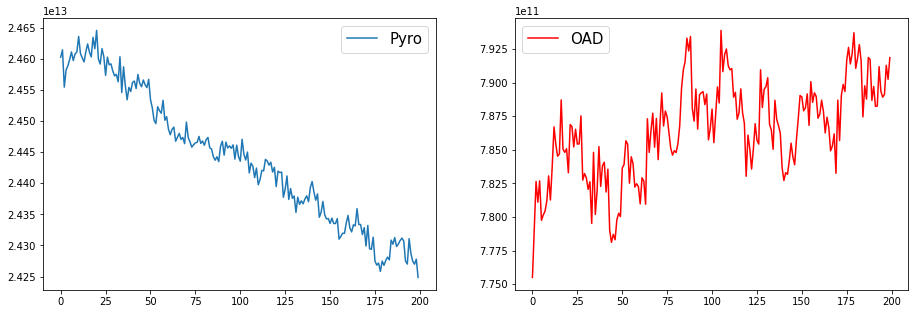

In [13]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})


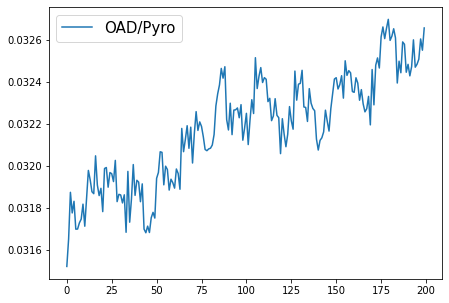

In [14]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

# print(S_fourier.std()/S_fourier.mean())


# from scipy.optimize import curve_fit

# def func_theory(x, A, B):
#     return A + B*x


# x = np.arange(200)

# popt, pcov = curve_fit(func_theory, x, S_fourier)

# A_opt,B_opt = popt

# print(B_opt/S_fourier.mean()*100)


# d_S_f = S_fourier - func_theory(x,A_opt,B_opt)
# print(d_S_f.std()/S_fourier.mean()*100)



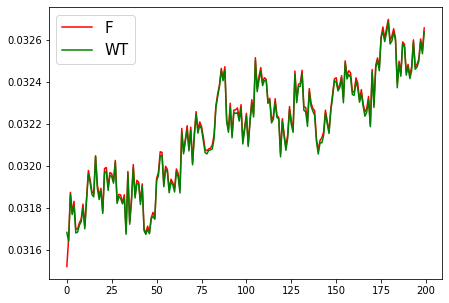

In [15]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.legend(prop={'size': 15})

In [16]:
print(S_fourier.std()-S_wavelet.std())

2.6930320182584427e-06


In [17]:
print(S_fourier.std()/S_fourier.mean(), S_wavelet.std()/S_wavelet.mean())

0.008127999736340078 0.00804751930015988


In [18]:
print((S_fourier - S_wavelet).mean())

1.284677420392951e-05


In [19]:
print((S_fourier - S_wavelet).mean()/S_fourier.mean()*100)

0.039924895159236


           x            y0          y1      y2          y3
0          0  5.274840e+08 -32779000.0 -171264   3549180.0
1          1  5.807320e+08 -33825000.0 -168960   2942720.0
2          2  6.446870e+08 -33116200.0 -170752  -1469440.0
3          3  6.795840e+08 -30837800.0 -154368  -8977410.0
4          4  7.147930e+08 -27103200.0 -172032 -10121500.0
...      ...           ...         ...     ...         ...
95995  95995 -1.380270e+09  33084200.0 -185856   1310720.0
95996  95996 -1.274260e+09  31452200.0 -173568   6033410.0
95997  95997 -1.363920e+09  28560400.0 -172288  10329300.0
95998  95998 -1.293970e+09  24231900.0 -174336   8512260.0
95999  95999 -1.089390e+09  18398200.0 -167680  16976400.0

[96000 rows x 5 columns]


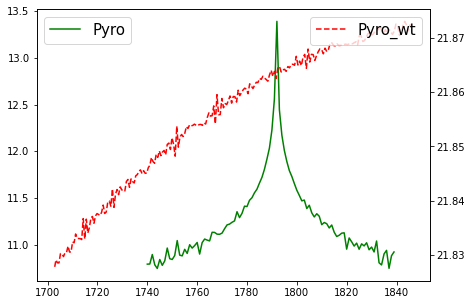

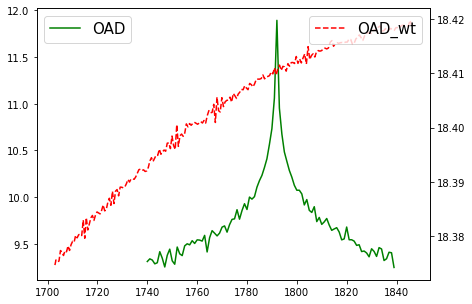

In [20]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df1)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df1.y1.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')




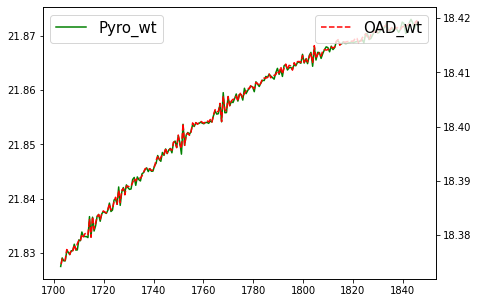

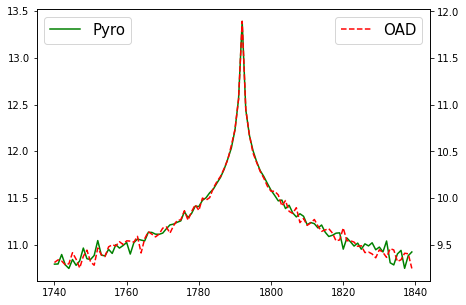

In [21]:
fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='green', label = 'Pyro_wt')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')




fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='red', linestyle='--', label = 'OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')